# 📉 Black-Scholes Option Pricing

This notebook uses the Black-Scholes model to calculate European-style Call and Put Option prices.

### 🧠 Formula:
The model calculates theoretical option prices based on:
- S: Current stock price
- K: Strike price
- T: Time to maturity (in years)
- r: Risk-free interest rate
- σ: Volatility

Below is the Python implementation and a sample calculation.


In [2]:
# 📦 Import the required Python libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as si

## 🔣 Define Black-Scholes Formula


In [3]:
# 📌 Black-Scholes formula function
def black_scholes(S, K, T, r, sigma, option='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2)*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option == 'call':
        return S * si.norm.cdf(d1) - K * np.exp(-r*T) * si.norm.cdf(d2)
    elif option == 'put':
        return K * np.exp(-r*T) * si.norm.cdf(-d2) - S * si.norm.cdf(-d1)


## 🔢 Example Calculation


In [4]:
# 🧮 Example values
S = 100     # Stock Price
K = 105     # Strike Price
T = 1       # Time to Expiry (1 year)
r = 0.05    # Interest Rate
sigma = 0.2 # Volatility (20%)

# ✅ Calculate call and put option prices
call_price = black_scholes(S, K, T, r, sigma, 'call')
put_price = black_scholes(S, K, T, r, sigma, 'put')

print(f"Call Option Price: ₹{call_price:.2f}")
print(f"Put Option Price: ₹{put_price:.2f}")


Call Option Price: ₹8.02
Put Option Price: ₹7.90


## 📊 Plot: Call Price vs Volatility


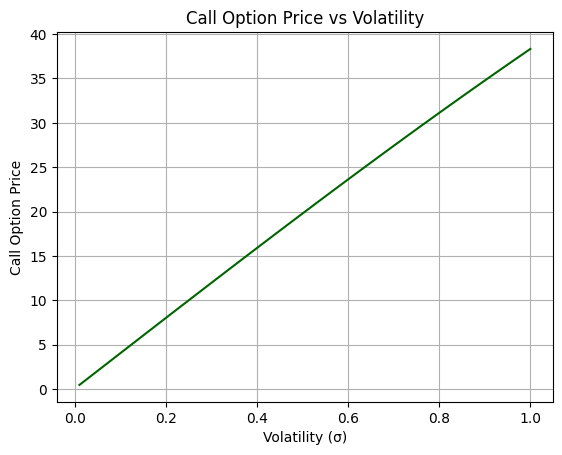

In [5]:
# 📈 Plot how call price changes with volatility
vols = np.linspace(0.01, 1, 100)
call_prices = [black_scholes(S, K, T, r, vol, 'call') for vol in vols]

plt.plot(vols, call_prices, color='darkgreen')
plt.title("Call Option Price vs Volatility")
plt.xlabel("Volatility (σ)")
plt.ylabel("Call Option Price")
plt.grid(True)
plt.show()
